In [11]:
# Import required library
import pandas as pd

# Load the dataset
data = pd.read_csv('CSCS_data_anon.csv')

# Print the original unique values (for inspection)
print("Original unique values in 'CONNECTION_social_time_family_p7d_grouped':")
print(data['CONNECTION_social_time_family_p7d_grouped'].unique())

# Define the replacement rules
replace_dict = {
    '5 or more hours': 3,
    '1 to 4 hours': 2,
    'Less than 1 hour': 1,
    'No time': 0,
    'Presented but no response': None,  # Convert to missing values
    'NA': None  # Convert to missing values
}

# Replace categorical variables with numerical values
data['CONNECTION_social_time_family_p7d_grouped'] = data['CONNECTION_social_time_family_p7d_grouped'].replace(replace_dict)

# Drop rows with missing values (if required for further analysis)
data_cleaned = data[['WELLNESS_life_satisfaction', 'CONNECTION_social_time_family_p7d_grouped']].dropna()


/tmp/ipykernel_86/922383682.py:5: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSCS_data_anon.csv')


Original unique values in 'CONNECTION_social_time_family_p7d_grouped':
['5 or more hours' '1 to 4 hours' 'Less than 1 hour' 'No time' nan
 'Presented but no response']


In [12]:
import statsmodels.formula.api as smf

# Fit a linear regression model
model = smf.ols('WELLNESS_life_satisfaction ~ CONNECTION_social_time_family_p7d_grouped', data=data_cleaned).fit()

# Print regression summary
print("Regression Summary:")
print(model.summary())

# Extract the estimated slope (β1) and intercept (β0)
beta_1_hat = model.params['CONNECTION_social_time_family_p7d_grouped']
beta_0_hat = model.params['Intercept']

# Display the complete regression equation
print(f"Complete Regression Equation: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x")

# Additional Notes: Regression summary includes coefficients, R², p-values, and more.


Regression Summary:
                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.040
Model:                                    OLS   Adj. R-squared:                  0.040
Method:                         Least Squares   F-statistic:                     366.0
Date:                        Wed, 27 Nov 2024   Prob (F-statistic):           5.88e-80
Time:                                01:12:03   Log-Likelihood:                -19742.
No. Observations:                        8782   AIC:                         3.949e+04
Df Residuals:                            8780   BIC:                         3.950e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]


/tmp/ipykernel_86/1611255437.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density = density.groupby(['x', 'y']).size().reset_index(name='count')  # Group by category and count occurrences


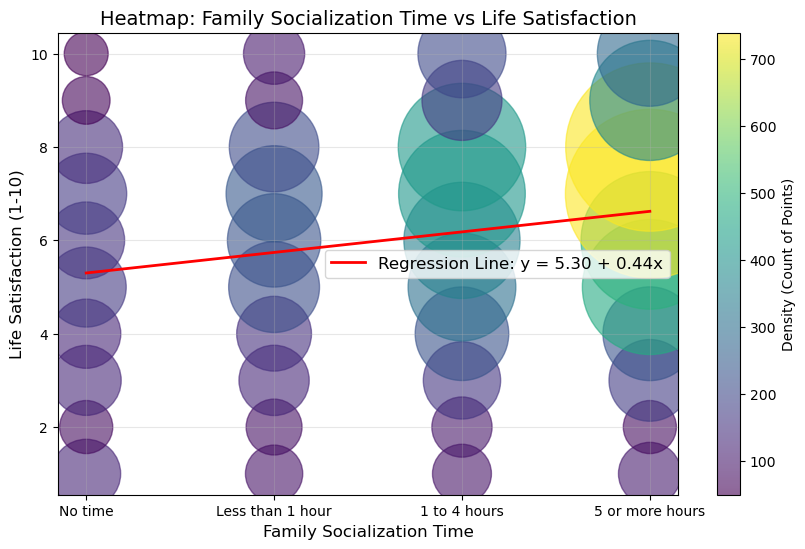

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Assume data_cleaned is already loaded and cleaned
x = data_cleaned['CONNECTION_social_time_family_p7d_grouped']
y = data_cleaned['WELLNESS_life_satisfaction']

# 1. Map numerical values to categorical labels
category_map = {
    0: 'No time',
    1: 'Less than 1 hour',
    2: '1 to 4 hours',
    3: '5 or more hours'
}
data_cleaned['CONNECTION_social_time_family_p7d_grouped_labels'] = x.map(category_map)

# Convert labels to categorical type for consistent ordering
data_cleaned['CONNECTION_social_time_family_p7d_grouped_labels'] = pd.Categorical(
    data_cleaned['CONNECTION_social_time_family_p7d_grouped_labels'], 
    categories=['No time', 'Less than 1 hour', '1 to 4 hours', '5 or more hours'], 
    ordered=True
)

# Group by categories and calculate density
density = pd.DataFrame({'x': data_cleaned['CONNECTION_social_time_family_p7d_grouped_labels'], 'y': y})
density = density.groupby(['x', 'y']).size().reset_index(name='count')  # Group by category and count occurrences

# 2. Fit a linear regression model using the original numerical x values
model = smf.ols('y ~ x', data={'x': x, 'y': y}).fit()  # Fit a simple linear regression
beta_0_hat = model.params['Intercept']  # Intercept of the regression line
beta_1_hat = model.params['x']  # Slope of the regression line

# 3. Plot the heatmap scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    density['x'].cat.codes,  # Use numerical codes for plotting
    density['y'], 
    s=density['count'] * 20,  # Adjust point size based on density
    alpha=0.6,  # Set transparency
    c=density['count'],  # Use density for color mapping
    cmap='viridis'  # Choose colormap
)

# 4. Plot the regression line
x_line = np.linspace(x.min(), x.max(), 100)  # Generate x values for the line
y_line = beta_0_hat + beta_1_hat * x_line  # Compute y values based on the regression equation
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression Line: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')

# 5. Add custom x-axis labels
plt.xticks(ticks=range(len(category_map)), labels=list(category_map.values()))  # Replace numerical ticks with category labels

# 6. Add colorbar and legend
plt.colorbar(scatter, label='Density (Count of Points)')  # Add colorbar to indicate density
plt.legend(fontsize=12)  # Add legend for the regression line

# 7. Improve visualization aesthetics
plt.title('Heatmap: Family Socialization Time vs Life Satisfaction', fontsize=14)
plt.xlabel('Family Socialization Time', fontsize=12)
plt.ylabel('Life Satisfaction (1-10)', fontsize=12)
plt.grid(alpha=0.3)

# 8. Show the plot
plt.show()
